In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import rc
rc('text', usetex=True)
fs = 22

# Task 1

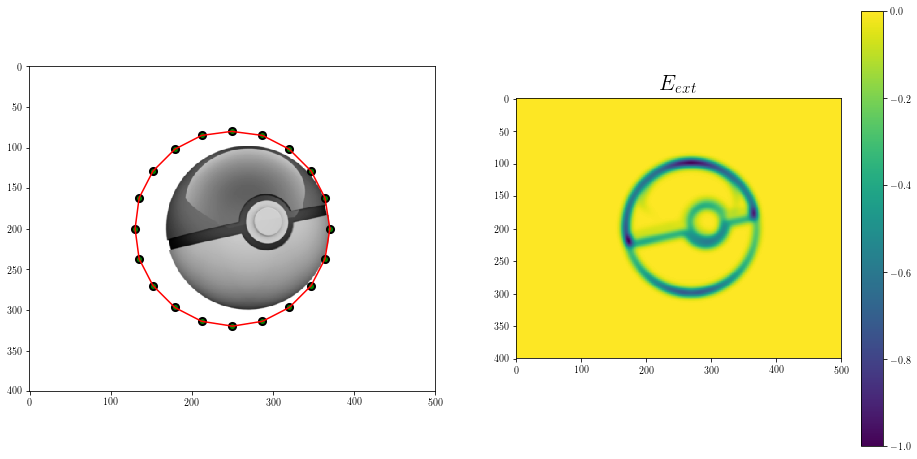

In [2]:
import task01_model_solution as task01

Im, V = task01.load_data('images/ball.png', radius=120)

E_ext = task01.get_external_energy(Im)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.imshow(Im, cmap='gray')
task01.plot_snake(ax, V)

ax = fig.add_subplot(122)
ax.set_title(r'$E_{ext}$', fontsize=fs)
im = ax.imshow(E_ext)
fig.colorbar(im, ax=ax)
plt.show()

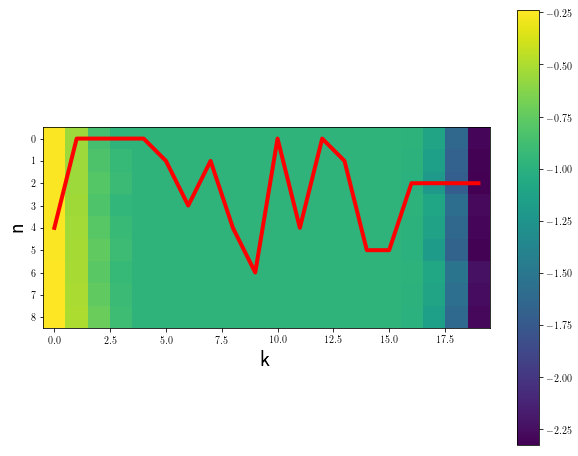

In [3]:
rel_k_pos = task01.get_relative_k_positions(3)

S, B = task01.create_cost_matrix(
    V, E_ext, rel_k_pos, alpha=0.001, gamma=1)

Trace, _ = task01.backtrack(S, B)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('k', fontsize=fs)
ax.set_ylabel('n', fontsize=fs)
im = ax.imshow(S.T)
ax.plot(range(len(Trace)), Trace, color='red', linewidth=4)
fig.colorbar(im, ax=ax)
plt.show()

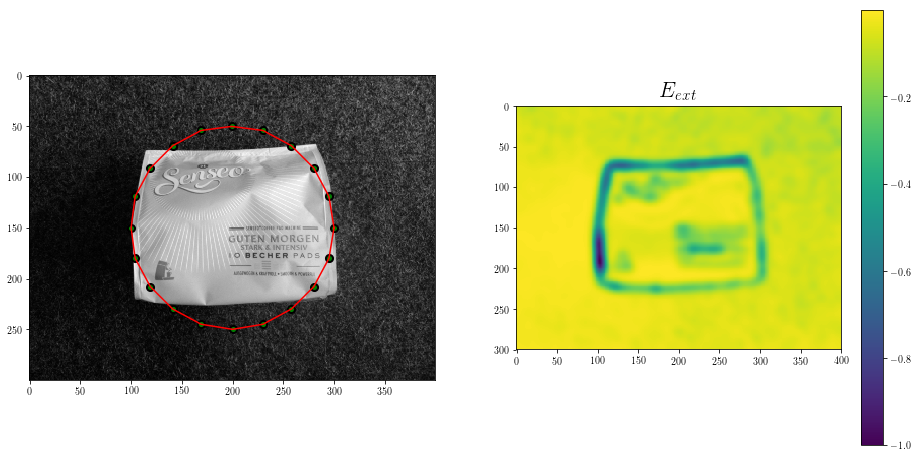

In [4]:
Im, V = task01.load_data('images/coffee.png', radius=100)

E_ext = task01.get_external_energy(Im)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.imshow(Im, cmap='gray')
task01.plot_snake(ax, V)

ax = fig.add_subplot(122)
ax.set_title(r'$E_{ext}$', fontsize=fs)
im = ax.imshow(E_ext)
fig.colorbar(im, ax=ax)
plt.show()

# Task 2

tau 0.25


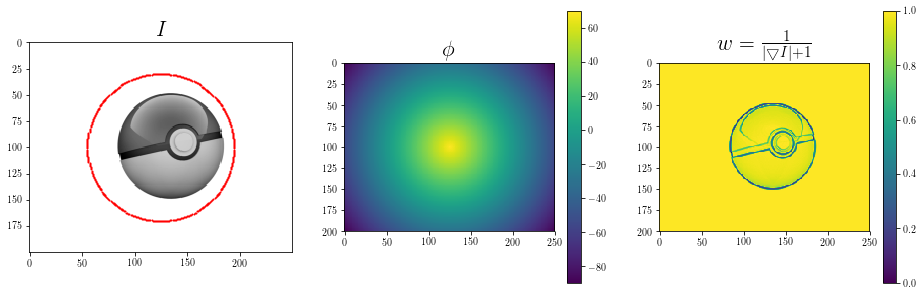

In [5]:
import task02_model_solution as task02

Im, phi = task02.load_data()
dx, dxx, gx, gy, w, tau = task02.get_w(Im)

print('tau', tau)

contour = task02.get_contour(phi)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(131)
ax.set_title(r'$I$', fontsize=fs)
ax.imshow(Im, cmap='gray')
ax.scatter(contour[:, 0], contour[:, 1], color='red', s=1)

ax = fig.add_subplot(132)
im = ax.imshow(phi)
fig.colorbar(im, ax=ax)
ax.set_title(r'$\phi$', fontsize=fs)

ax = fig.add_subplot(133)
im = ax.imshow(w)
fig.colorbar(im, ax=ax)
ax.set_title(r'$w = \frac{1}{\vert \bigtriangledown I \vert + 1}$', 
             fontsize=fs)

plt.show()

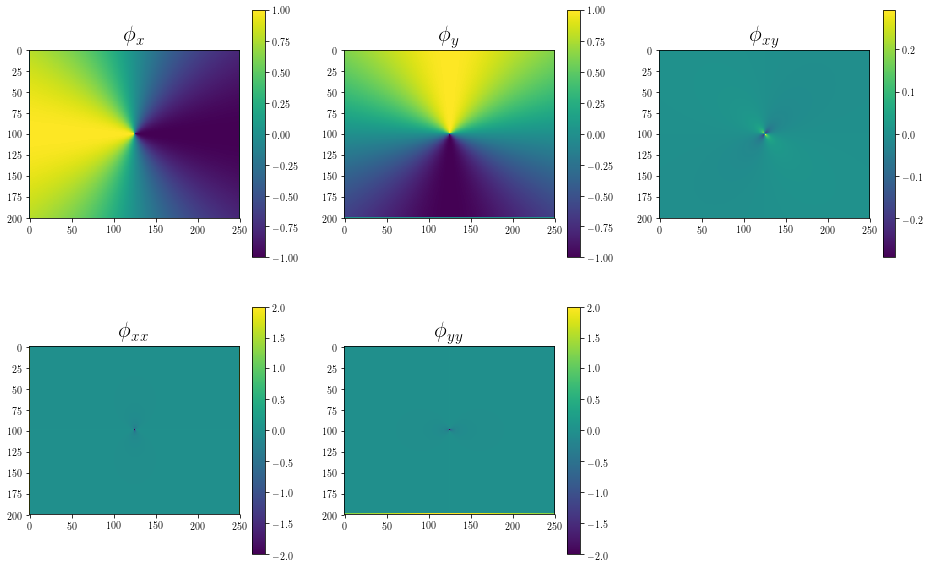

In [6]:
D = task02.get_derivatives(phi, dx, dxx)
Names = [r'$\phi_x$', r'$\phi_y$',
         r'$\phi_{xy}$',
         r'$\phi_{xx}$', r'$\phi_{yy}$']

fig = plt.figure(figsize=(16, 10))
for i, (d, name) in enumerate(zip(D, Names)):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_title(name, fontsize=fs)
    im = ax.imshow(d)
    fig.colorbar(im, ax=ax)


plt.show()

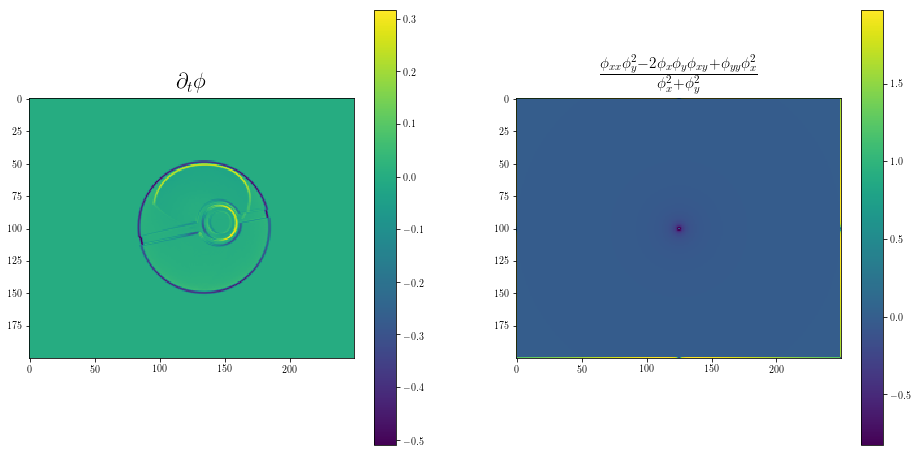

In [7]:
fig = plt.figure(figsize=(16, 8))
uphill = task02.uphill_direction(gx, gy, phi)
ax = fig.add_subplot(121)
im = ax.imshow(uphill)
fig.colorbar(im, ax=ax)
ax.set_title(r'$\partial_t \phi$', fontsize=fs)

curv = task02.curvature(phi, dx, dxx)
ax = fig.add_subplot(122)
im = ax.imshow(curv)
fig.colorbar(im, ax=ax)
ax.set_title(r'$\frac{\phi_{xx}\phi_y^2- 2 \phi_x \phi_y \phi_{xy} + \phi_{yy}\phi_x^2}{\phi_x^2 + \phi_y^2}$', 
             fontsize=fs)

plt.show()